In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# id
# sepal length
# sepal width
# petal length
# petal width
# specie (our label)
iris_data = pd.read_csv('./data/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [30]:
from sklearn.utils import shuffle

iris_data = shuffle(iris_data, random_state=69)
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5,5.0,3.6,1.4,0.2,0
58,59,6.6,2.9,4.6,1.3,1
20,21,5.4,3.4,1.7,0.2,0
114,115,5.8,2.8,5.1,2.4,2
31,32,5.4,3.4,1.5,0.4,0
...,...,...,...,...,...,...
22,23,4.6,3.6,1.0,0.2,0
49,50,5.0,3.3,1.4,0.2,0
90,91,5.5,2.6,4.4,1.2,1
107,108,7.3,2.9,6.3,1.8,2


In [31]:
np.unique(iris_data['Species'])

array([0, 1, 2])

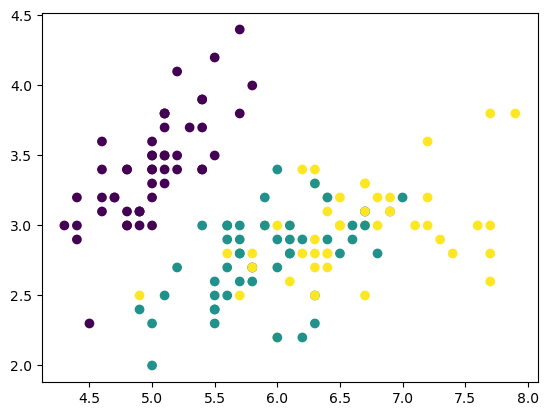

In [32]:
plt.scatter(iris_data['SepalLengthCm'], iris_data['SepalWidthCm'], c=iris_data['Species'])
plt.show()

In [33]:
corrs_matrix = iris_data.corr()
corrs_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


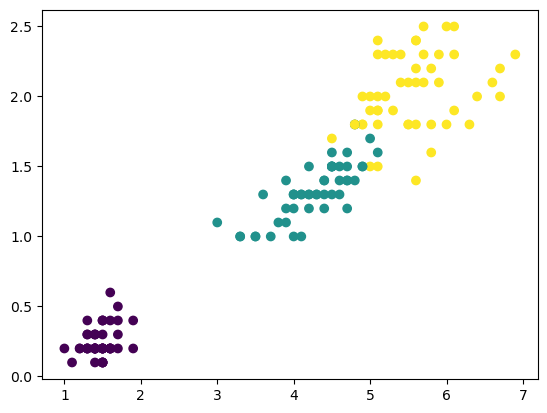

In [34]:
plt.scatter(iris_data['PetalLengthCm'], iris_data['PetalWidthCm'], c=iris_data['Species'])
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('model', LogisticRegression())
])



0.9666666666666667

In [41]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('model', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

1.0